### probability Ration Encoding Means we can use this Technique with Target Variable and Target Variable should be Binary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv' , usecols = ['Cabin' , 'Embarked' , 'Survived'])

In [4]:
df.head()

,Survived,Cabin,Embarked
0,0,NaN,Q
1,1,NaN,S
2,0,NaN,Q
3,0,NaN,S
4,1,NaN,S


In [5]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [6]:
df['Cabin'].unique()

array(['n', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [7]:
df.head()

,Survived,Cabin,Embarked
0,0,n,Q
1,1,n,S
2,0,n,Q
3,0,n,S
4,1,n,S


In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=42)

In [11]:
x_train.head()

,Cabin,Embarked
109,F,S
176,n,S
366,n,C
407,C,C
280,n,S


In [12]:
x.head()

,Cabin,Embarked
0,n,Q
1,n,S
2,n,Q
3,n,S
4,n,S


In [13]:
x_train['Survived'] = y

In [14]:
x_train.head()

,Cabin,Embarked,Survived
109,F,S,0
176,n,S,1
366,n,C,0
407,C,C,0
280,n,S,1


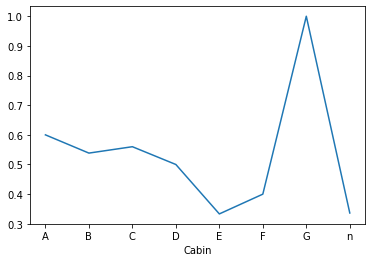

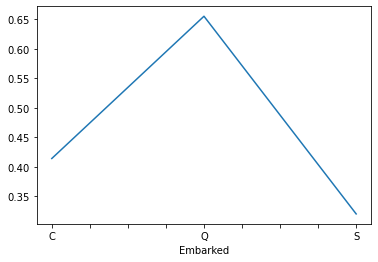

In [15]:
for i in ['Cabin' , 'Embarked']:
    x_train.groupby([i])['Survived'].mean().plot()
    plt.show()

### Finding The Probabilty of Survived

In [16]:
value = x_train.groupby(['Embarked'])['Survived'].mean()

In [17]:
value

Embarked
C    0.414286
Q    0.655172
S    0.320442
Name: Survived, dtype: float64

In [18]:
value1 = pd.DataFrame(value)

In [19]:
value1

,Survived
Embarked,
C,0.414286
Q,0.655172
S,0.320442


In [20]:
value1['Dead'] = 1-value1['Survived']

In [21]:
value1

,Survived,Dead
Embarked,,
C,0.414286,0.585714
Q,0.655172,0.344828
S,0.320442,0.679558


In [22]:
value1['Ratio'] = value1['Survived']/value1['Dead']

In [23]:
value1

,Survived,Dead,Ratio
Embarked,,,
C,0.414286,0.585714,0.707317
Q,0.655172,0.344828,1.900000
S,0.320442,0.679558,0.471545


In [24]:
a = value1['Ratio'].to_dict()

In [25]:
a

{'C': 0.7073170731707319, 'Q': 1.9, 'S': 0.47154471544715454}

In [26]:
x_train['Embarked'] = x_train['Embarked'].map(a)

In [27]:
x_train.head()

,Cabin,Embarked,Survived
109,F,0.471545,0
176,n,0.471545,1
366,n,0.707317,0
407,C,0.707317,0
280,n,0.471545,1
